<a href="https://colab.research.google.com/github/jaesik103/Learning/blob/main/pytorch/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


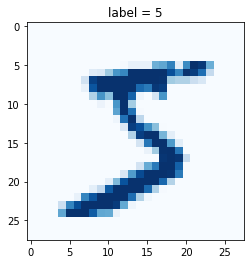

In [7]:
row = 0 # 13번째 이미지
data = df.iloc[row]

label = data[0] # 0번째는 label

img = data[1:].values.reshape(28, 28) # array -> list -> reshape
plt.title('label = ' + str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

In [8]:
class Classifier(nn.Module):
    def __init__(self):
        # 부모 클래스 초기화
        super().__init__()

        # 신경망 레이어 정의
        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.LeakyReLU(0.02),
            nn.LayerNorm(200),
            nn.Linear(200, 10),
            nn.LeakyReLU(0.02)
        )


        #손실함수
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.Adam(self.parameters())

        #변수초기화
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        #모델 실행
        return self.model(inputs)

    def train(self, inputs, targets):
        #신경망 출력 계산
        outputs = self.forward(inputs)

        #손실 계산
        loss = self.loss_function(outputs, targets)
        

        #카운터를 증가시키고 10회마다 오차 저장
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        
        if (self.counter % 10000 == 0):
            print('counter = ', self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass

In [9]:
from torch.utils.data import Dataset

In [10]:
class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index, 0]
        target = torch.zeros((10))
        target[label] = 1.0

        # 0-255 dlalwlfmf 0-1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0
        # 레이블 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        plt.title('label = ' + str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [11]:
mnist_dataset = MnistDataset('/content/drive/MyDrive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')

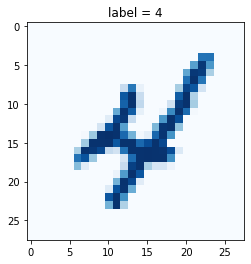

In [12]:
mnist_dataset.plot_image(9)

In [13]:
%%time

# 신경망 생성
C = Classifier()

# MNIST 데이터에 대해 훈련 진행
epochs = 3

for i in range(epochs):
    print('training epoch', i+1, 'of', epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 13min 50s, sys: 8.51 s, total: 13min 58s
Wall time: 14min 7s


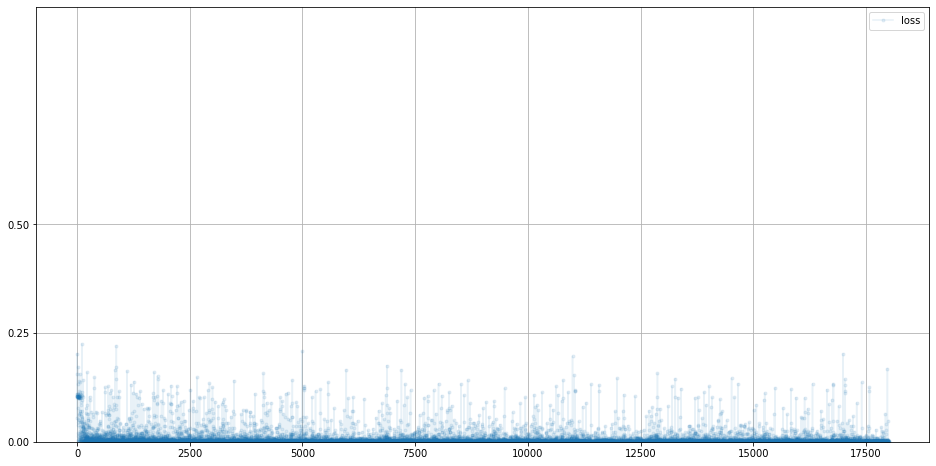

In [14]:
C.plot_progress()

In [15]:
# load MNIST test data

mnist_test_dataset = MnistDataset('/content/drive/MyDrive/Colab Notebooks/myo_gan/mnist_data/mnist_test.csv')

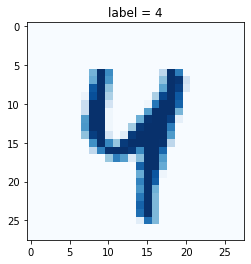

In [16]:
# pick a record
record = 42

# plot image and correct label
mnist_test_dataset.plot_image(record)

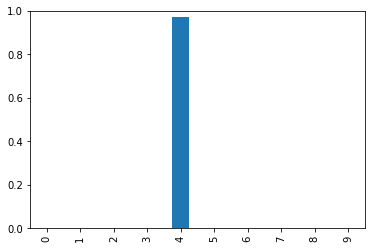

In [17]:
# visualise the answer given by the neural network

image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

# plot output tensor
pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [18]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print(score, items, score/items)

9711 10000 0.9711
